# Import Necessary Modules


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

# Display Loaded Data

In [2]:
def display_img(images, labels):
  n = len(labels)
  plt.figure(figsize=(8, 6))
  for i in range(n):
    plt.subplot(5, 5, i + 1)
    if len(images[i].shape) == 2: # Grayscale image
      plt.imshow(images[i], cmap='gray')
    else: # RGB image
      plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

  plt.tight_layout()
  plt.show()

# Load Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


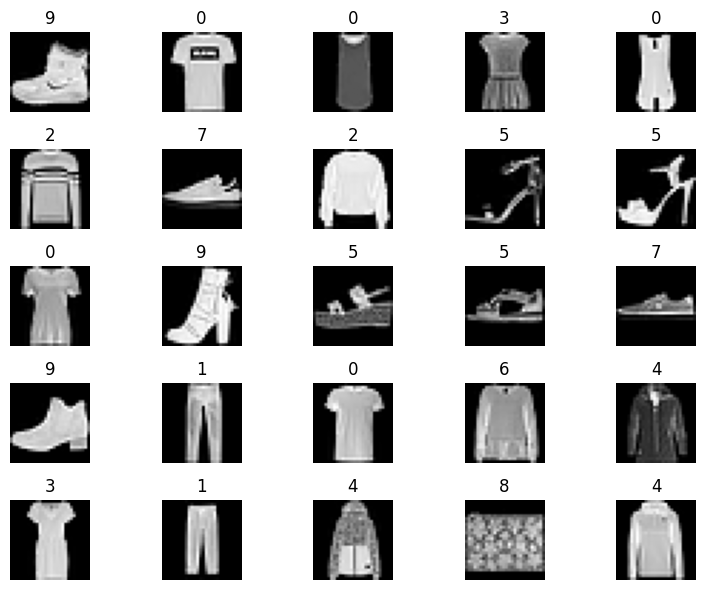

In [3]:
# Load Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Investigate Loaded Data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Display some loaded image data
display_img(x_train[:25], y_train[:25])

# Prepare Datasets

In [4]:
# Turn 2D images into 3D so that trainX and trainY will be 4D since Convolutional layer takes 4D data as input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Investigate update x
print(x_train.shape)
print(x_test.shape)

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Investigate updated y
print(y_train.shape)
print(y_test.shape)

print(y_train[:5])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Build a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [5]:
inputs = Input((28, 28, 1), name='InputLayer')
x = Flatten()(inputs)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax', name='OutputLayer')(x)
model = Model(inputs, outputs, name='Multi-Class-Classification')
model.summary()

Model: "Multi-Class-Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,335,818 (5.10 MB)

 Trainable params: 1,334,794 (5.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

# Train a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fcnn_history = model.fit(x_train, y_train, batch_size = 128, validation_split = 0.1, epochs = 10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7491 - loss: 0.7105 - val_accuracy: 0.8343 - val_loss: 0.4483
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8356 - loss: 0.4540 - val_accuracy: 0.8468 - val_loss: 0.4159
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.4027 - val_accuracy: 0.8645 - val_loss: 0.3770
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3709 - val_accuracy: 0.8695 - val_loss: 0.3595
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3478 - val_accuracy: 0.8747 - val_loss: 0.3538
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8737 - loss: 0.3422 - val_accuracy: 0.8763 - val_loss: 0.3549
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8775 - loss: 0.3271 - val_accuracy: 0.8625 - val_loss: 0.3673
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8829 - loss: 0.3189 - val_accuracy: 0.

# Test a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [7]:
# Evaluate model performance
model.evaluate(x_test, y_test)

# Predict Y values
y_predict = model.predict(x_test)

print('y_original  y_predicted')
print('==========  ===========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.3480
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
y_original  y_predicted
==========  ===========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


# Build a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [8]:
inputs = Input((28, 28, 1), name = 'InputLayer')
x = Conv2D(32, (3, 3), padding = 'same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding = 'same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Final Dense Layer
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax', name='OutputLayer')(x)

# Create the model
model = Model(inputs, outputs, name='ConvNet-Classification')

# Summary of the Model
model.summary()

Model: "ConvNet-Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,266 (6.39 MB)

 Trainable params: 1,676,266 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

# Train a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = model.fit(x_train, y_train, batch_size = 128, validation_split = 0.1, epochs = 10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7414 - loss: 2.6623 - val_accuracy: 0.8748 - val_loss: 0.3483
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8969 - loss: 0.2788 - val_accuracy: 0.9020 - val_loss: 0.2678
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9172 - loss: 0.2270 - val_accuracy: 0.9030 - val_loss: 0.2714
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9314 - loss: 0.1819 - val_accuracy: 0.9108 - val_loss: 0.2569
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9442 - loss: 0.1524 - val_accuracy: 0.8997 - val_loss: 0.3017
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9517 - loss: 0.1286 - val_accuracy: 0.9055 - val_loss: 0.2812
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9615 - loss: 0.1075 - val_accuracy: 0.9095 - val_loss: 0.2920
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9672 - loss: 0.0894 - val_accuracy: 

#  Test a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [10]:
# Evaluate model performance
model.evaluate(x_test, y_test)

# Predict Y values
y_predict = model.predict(x_test)

print('Original Y  Predict Y')
print('==========  =========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9126 - loss: 0.4111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Original Y  Predict Y
==========  =========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


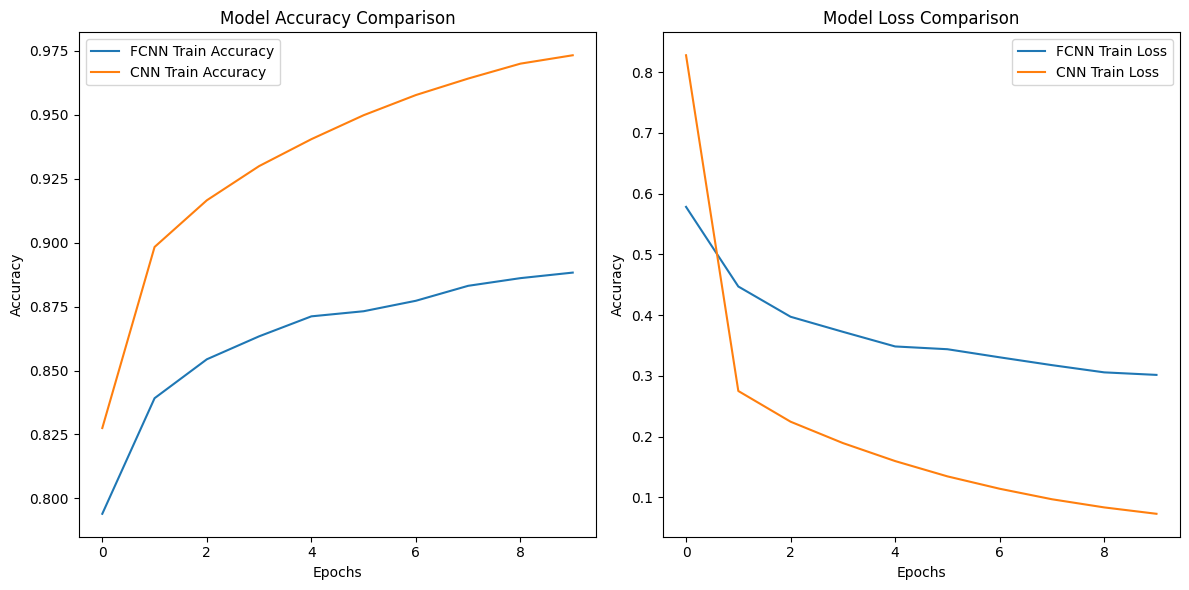

In [11]:
# Accuracy and loss data for FCNN
fcnn_train_acc = fcnn_history.history['accuracy']
fcnn_val_acc = fcnn_history.history['val_accuracy']
fcnn_train_loss = fcnn_history.history['loss']
fcnn_val_loss = fcnn_history.history['val_loss']

# Accuracy and loss data for CNN
cnn_train_acc = cnn_history.history['accuracy']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fcnn_train_acc, label='FCNN Train Accuracy')
#plt.plot(fcnn_val_acc, label='FCNN Val Accuracy')
plt.plot(cnn_train_acc, label='CNN Train Accuracy')
#plt.plot(cnn_val_acc, label='CNN Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fcnn_train_loss, label='FCNN Train Loss')
#plt.plot(fcnn_val_loss, label='FCNN Val Loss')
plt.plot(cnn_train_loss, label='CNN Train Loss')
#plt.plot(cnn_val_loss, label='CNN Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()